# TAX-FREE SAVINGS ACCOUNT Project

by Alexandros Taderera

### Executive Summary:
> South Africa's Tax-Free Savings Account (TFSA) program is one of great macroeconomic importance. 

> The South African Treasury released a white paper titled [***"INCENTIVISING NON-RETIREMENT SAVINGS"***](http://www.treasury.gov.za/comm_media/press/2012/Incentivising%20non-retirement%20savings.pdf) *[2012]*. This paper outlines the financial vulnerability of the average South African household and why we need rapid and immediate policy action.
> From 2016-17 the [***"A STUDY OF TAX-FREE SAVINGS ACCOUNT TAKEUP IN SOUTH AFRICA"***](https://www.intellidex.co.za/wp-content/uploads/2017/07/TFSA-Survey-Report-2017-Live-Version-FINAL.pdf) reports were published following the introduction of ***collective investment schemes*** (the ability to include ETFs, Mutual Funds, Unit Trusts etc.) as part of Tax-Free Savings. The uptake has been notable.


|Year |Accounts Opened|Amount Held |1st-time Buyers|
|:-----|:----:|----:|----:|
|2015 |35 384 |**R284m** |32%|
|2016 |262 493 |**R2 600m** | 21% |
|2017 |207 172|**R5 174m**| --|

> A large portion of TFSA investors are first-time buyers and part-time investors. Such investors can benefit greatly from implementing basic risk-management protocols.


###### MODELLING PERSCPECTIVE: 
>  I use modelling techniques of [*"A Semiparametric Graphical Modelling Approach For Large-Scale Equity Selection"*](https://doi.org/10.1080/14697688.2015.1101149) by Liu, Mulvey, Zhao [2015]. I take a universe of assets and create a "Risk Network" of the latent risk-factors in our given universe- advantageous for TFSA investing since the universe is well-defined. A cluster defines assets linked to similar latent factors. I identified [four](#clusters) dominant risk-clusters: SA Property, SA Equities, Developed Market Equities, and Modified SA Equities (Islamic banking and inflation protection on SA Equities). 
<br /> 
<br /> 
The assets that are in clusters of one are considered "risk-independent". They are the most orthogonal to our systematic risk-factors and thus are easy pickings for anyone looking for instant diversification.
<br /> 


###### RESULTS AND INTERPRETATION: 
>How do these assets affect a porfolio they are added to?
<br /> 
>My initial hypothesis was that this method would reduce portfolio [performance](#performance), but improve risk-adjusted performance. Instead I found a marginal improvement (30 basis points) in performance and significant improvement (10%) in the Sharpe Ratio distribution. Furthermore, the treated (containing a risk-independent asset) portfolios had improved downside-risk performance metrics.
<br /> 

###### SHORTCOMINGS:
>Data, Data, Data. 
<br /> 
Large "pops" in price data add fat tails to any distribution and heavily skew the results of any parametric modelling methods. This does not affect the graphical model's performance, but rather the means and standard deviation estimates are corrupted. I attempted to stay away from any methods that required expected returns, volatility or covariance wherever possible and thus constructed equally weighted portfolios after the graphical model stage however, the outliers still skewed a lot of the findings


### Steps:
#### 1)  [Data Collection and Processing](#0)
- Scrape TSFA assets available on the [EasyEquities](https://etfs.easyequities.co.za/finder) platform then download price data through the [Yahoo Finance](https://finance.yahoo.com) API

#### 2) [Machine Learning Model](#1)
- Use a sparse covariance matrix to determine significant covariance relations amongst assets and ignore the rest. Much like a social network, assets exposed to similar risk are more likely to be connected to other assets in the 'Risk Network'. Assets in a cluster of one are referred to as Risk-Independent assets

#### 3)  [Test the 'Pure Portfolio' of Risk-Independent assets](#2)
- Build equal risk-contribution and equal weight portfolios

#### 4) [Experiment](#3)
- Use random portfolio construction to test the impact of adding our Risk-Independent assets


In [5]:
# Import all the necessary packages

import numpy as np #for numerical array data
import pandas as pd #for tabular data
import matplotlib.pyplot as plt #for plotting purposes
import seaborn as sns
import csv
from datetime import datetime, timedelta

from sklearn import cluster, covariance, manifold
from matplotlib.collections import LineCollection #for plotting purposes

#hypothesis tests
import scipy.stats as stats
import math

import warnings
warnings.filterwarnings('ignore')

In [47]:
# Import the self-defined functions from the python file
from Graphical_Analysis_functions import *
#import portfolio_analyzer as pa

In [40]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<a class="anchor" id="0"></a>
# Step 1)  Data Collection and Processing
- Scrape assets availible on the EasyEquities platform then download price data from Yahoo API


In [53]:
firms_info[['institution', 'fund_name', 'fund_type', 'asset_class',
             'region', 'Sector', 'index_weighting_method', 'domestic_foreign',
             'tfsa','expenseratio', 'dividends', 'riskprofile', 'fundsize']]

,institution,fund_name,fund_type,asset_class,region,Sector,index_weighting_method,domestic_foreign,tfsa,expenseratio,dividends,riskprofile,fundsize
ETFSAP.JO,1nvest,1nvest SA Property ETF,ETF,Real Estate,South Africa,Blend,Market Cap,Domestic,YES,0.29,Pays Dividends,Aggressive,960828300
ETFSWX.JO,1nvest,1nvest SWIX 40 ETF,ETF,Equity,South Africa,Blend,Market Cap,Domestic,YES,0.29,Pays Dividends,Aggressive,1820832895
ETFT40.JO,1nvest,1nvest Top 40 ETF,ETF,Equity,South Africa,Blend,Market Cap,Domestic,YES,0.29,Pays Dividends,Aggressive,809887251
ASHEQF.JO,Ashburton,Ashburton Global 1200 Equity Fund of Funds ETF,ETF,Equity,Global,Blend,Market Cap,Foreign,YES,0.42,Pays Dividends,0,1301000451
ASHINF.JO,Ashburton,Ashburton Inflation ETF,ETF,Fixed Income,South Africa,Inflation Protected,Market Cap,Domestic,YES,0.42,Pays Dividends,Low,394652956
ASHMID.JO,Ashburton,Ashburton MidCap ETF,ETF,Equity,South Africa,Blend,Market Cap,Domestic,YES,0.61,Pays Dividends,Moderate / Aggressive,562310437
ASHT40.JO,Ashburton,Ashburton Top40 ETF,ETF,Equity,South Africa,Blend,Market Cap,Domestic,YES,0.13,Pays Dividends,Moderate / Aggressive,1948846160
DIVTRX.JO,CoreShares,CoreShares DivTrax ETF,ETF,Equity,South Africa,Blend,Equal,Domestic,YES,0.54,Pays Dividends,Moderate / Aggressive,138566848
PREFTX.JO,CoreShares,CoreShares PrefTrax ETF,ETF,Equity,South Africa,Preferred,Market Cap,Domestic,YES,0.56,Pays Dividends,Conservative,320716745
CSP500.JO,CoreShares,CoreShares S&P 500 ETF,ETF,Equity,U.S.,Blend,Market Cap,Foreign,YES,0.39,Pays Dividends,Aggressive,1394418993


In [ ]:
# Get and print the Sector Information
Sectors = firms_info.Sector.unique()
print(Sectors)

In [60]:
# Load Stock Return dataset 
file_name = 'CleanedData_TSFA_Daily.xlsx'
sheet_name = 'Stock Returns'
df = pd.read_excel(file_name, sheet_name, index_col=0)
df.index=pd.to_datetime(df.index)    
data = df.copy()['2018':'2021']
data
# 

,ETFSAP.JO,ETFSWX.JO,ETFT40.JO,ASHEQF.JO,ASHINF.JO,ASHMID.JO,ASHT40.JO,DIVTRX.JO,PREFTX.JO,CSP500.JO,...,SYGEU.JO,SYGUK.JO,SYGP.JO,SYGJP.JO,SYGUS.JO,SYGWD.JO,SYG500.JO,SYGSW4.JO,SYGT40.JO,J203.JO
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,0.001304,0.014322,0.008598,-0.001279,0.010763,-0.009913,0.055715,-0.007882,0.002439,0.008133,...,-0.002087,0.015565,0.010356,0.017964,0.010890,0.004213,0.000881,0.018628,0.014209,0.003806
2018-01-03,-0.013887,-0.001661,0.002273,0.000256,0.000000,-0.015019,-0.043738,-0.017544,-0.004866,0.001793,...,0.000570,-0.000078,0.000301,-0.000840,0.005070,0.003432,0.002934,-0.002494,0.000000,-0.001700
2018-01-04,-0.007628,-0.008319,-0.006426,0.002561,0.000000,-0.002541,-0.006048,0.000000,-0.009780,0.006561,...,0.019954,-0.002112,-0.007535,0.020185,0.017970,0.009882,0.001463,-0.006667,0.000000,-0.002564
2018-01-05,0.001478,0.007550,0.006848,0.010728,0.000000,0.011465,0.006845,0.008423,0.004938,0.006519,...,0.014906,0.014028,0.000000,0.007420,0.005884,0.012044,0.010809,0.000000,0.000000,0.004042
2018-01-08,0.001771,0.002498,0.005290,0.007329,0.001936,0.003778,0.005288,0.005012,0.001229,0.003238,...,0.000918,0.001159,0.013665,0.010638,-0.004002,0.004091,0.007514,0.009228,0.007194,0.005379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-07,-0.008164,0.013468,0.012163,0.001421,0.000000,0.004054,0.013639,0.010678,-0.001297,0.006797,...,0.002700,0.004766,0.013625,0.003871,0.004365,0.004609,0.006188,0.011715,0.012279,0.014527
2021-07-08,0.006098,-0.023256,-0.024527,-0.014817,0.004215,-0.008075,-0.024286,-0.013321,0.002597,-0.012538,...,-0.023381,-0.020858,-0.007648,-0.018638,-0.013875,-0.014223,-0.012772,0.000000,-0.024422,-0.023394
2021-07-09,0.002727,0.011905,0.004894,0.008480,0.004198,0.009498,0.018836,0.009777,0.000000,0.009930,...,0.019008,0.013893,0.003737,0.017682,0.005425,0.005818,0.006229,-0.010753,0.019231,0.017505


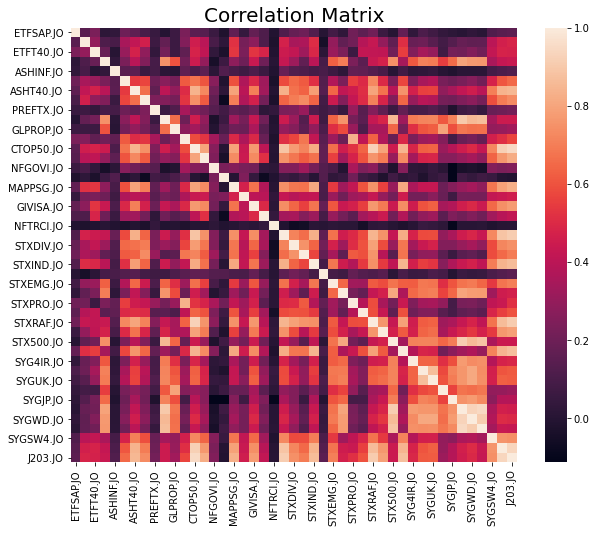

In [62]:
cov = data.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cov) # create seaborn heatmap
plt.title('Correlation Matrix', fontsize = 20) # title with fontsize 20
plt.show()


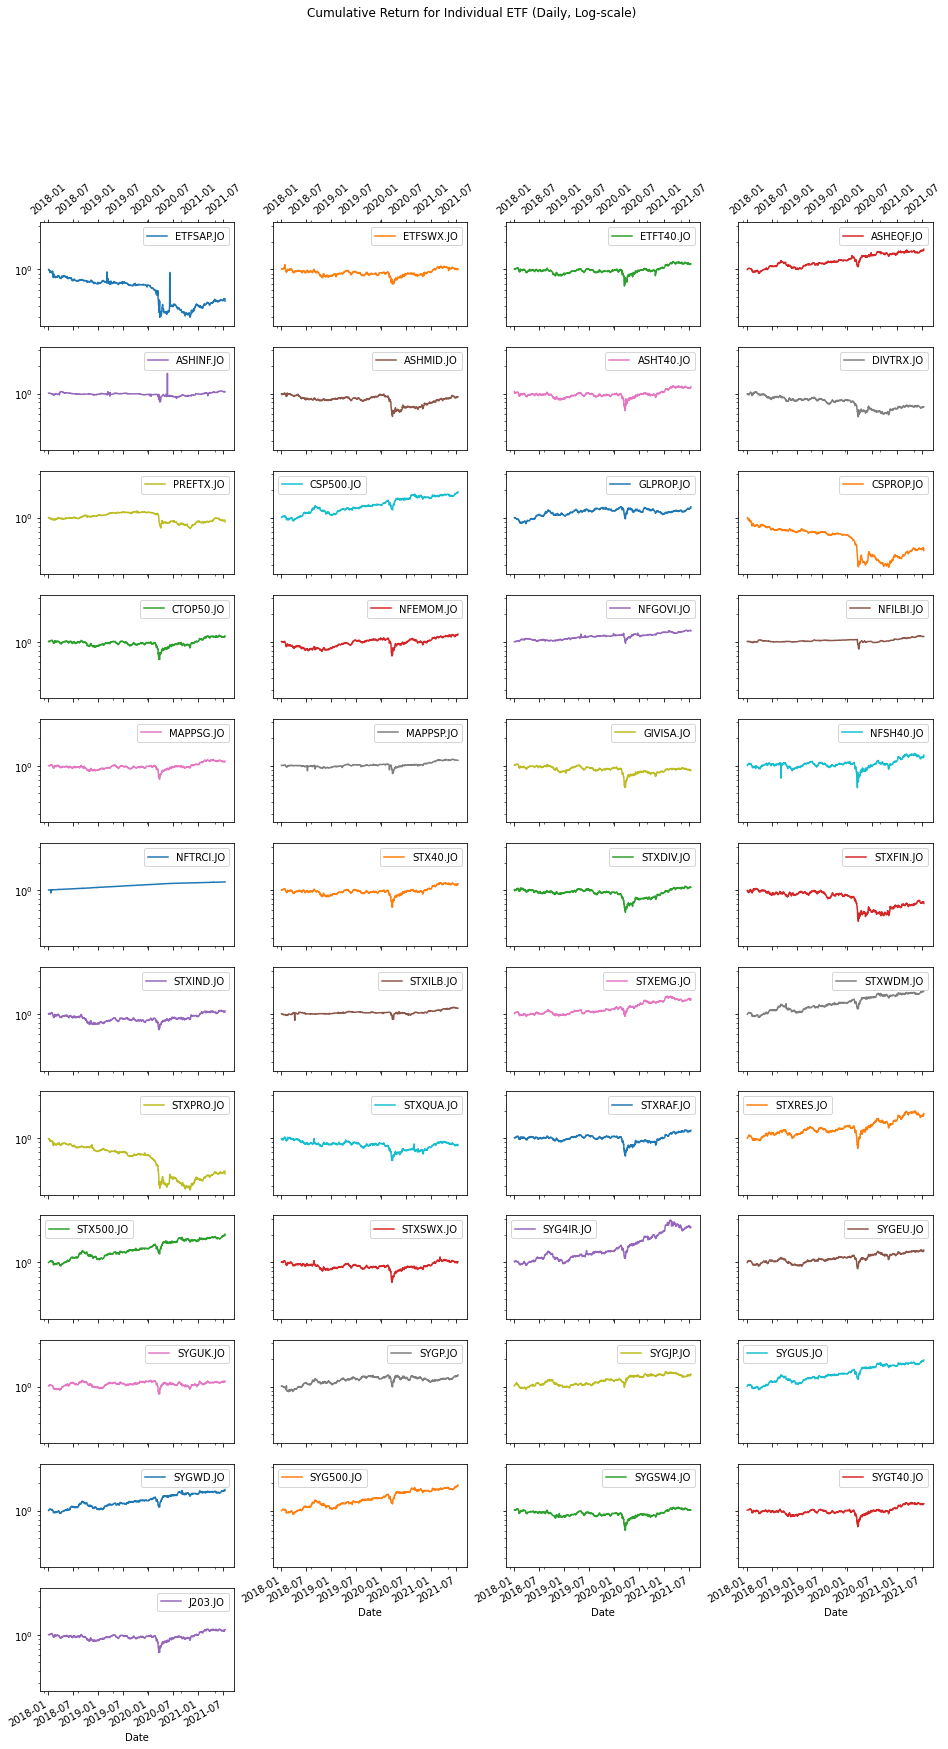

In [63]:
# Plot cumulative return for each firm
lo_col = 4
lo_row = int(np.ceil(len(df.columns)/4))
f_hei = lo_row * 2.5
f_wid = lo_col * 4
ax = (data+1).cumprod().plot(subplots=True, layout=(lo_row, lo_col), figsize=(f_wid, f_hei),
                             logy=True, sharex=True, sharey=True,
                             title='Cumulative Return for Individual ETF (Daily, Log-scale)');
for i in range(lo_col):
    ax[0,i].xaxis.set_tick_params(which='both', top = True, labeltop=True, labelrotation=40)
plt.show()

In [65]:
###########################################   CAN BE CHANGED  #############################################
start_date = '2018-01-02'
end_date   = '2019-01-03'
###########################################   CAN BE CHANGED  #############################################

<a class="anchor" id="1"></a>
# Step 2)  Machine Learning Model
- Use a sparse covarriance matrix to determine significant covarriance relations amongst assets and ignore the rest. Find assets not in a cluster, referred to as Risk-Independent/Independent assets


In [66]:
###########################################   CAN BE CHANGED  #############################################
## Start and End date we are considering:
start_date = '2018-01-02'
end_date   = '2019-01-03'

## Sectors which we will be testing:
Sectors_chosen = ['Blend', 'Government', 'Inflation Protected', 
                  'Value', 'Conservative Allocation', 'Preferred', 
                  'Growth', 'Aggressive Allocation']

## The list of firms we want to drop:
drop_firm = [] #['NFNAM.JO'] #, 'STXMNT.JO', 'USTXCN.JO']

## Whether we want to display the summary statisitcs and/or individual firm performance:
display_SumStat = True
display_IndRet = True
###########################################   CAN BE CHANGED  #############################################

<a class="anchor" id="clusters"></a>

Results over the time period  2018-01-02  to  2019-01-03 :

Sectors choosen in the Graphical Analysis are:
['Blend', 'Government', 'Inflation Protected', 'Value', 'Conservative Allocation', 'Preferred', 'Growth', 'Aggressive Allocation']

Number of firms examined: 45
Cluster 1: ETFSAP.JO, CSPROP.JO, STXPRO.JO
Cluster 2: NFSH40.JO, MAPPSP.JO
Cluster 3: ASHEQF.JO, CSP500.JO, GLPROP.JO, STXWDM.JO, STX500.JO, SYGEU.JO, SYGUK.JO, SYGP.JO, SYGJP.JO, SYGUS.JO, SYGWD.JO, SYG500.JO, SYG4IR.JO
Cluster 4: ETFSWX.JO, ETFT40.JO, ASHMID.JO, ASHT40.JO, DIVTRX.JO, CTOP50.JO, GIVISA.JO, STX40.JO, STXDIV.JO, STXFIN.JO, STXIND.JO, STXEMG.JO, STXQUA.JO, STXRAF.JO, STXRES.JO, STXSWX.JO, SYGSW4.JO, SYGT40.JO, J203.JO, NFEMOM.JO, MAPPSG.JO
Cluster 5: NFGOVI.JO
Cluster 6: NFTRCI.JO
Cluster 7: ASHINF.JO
Cluster 8: NFILBI.JO
Cluster 9: STXILB.JO
Cluster 10: PREFTX.JO


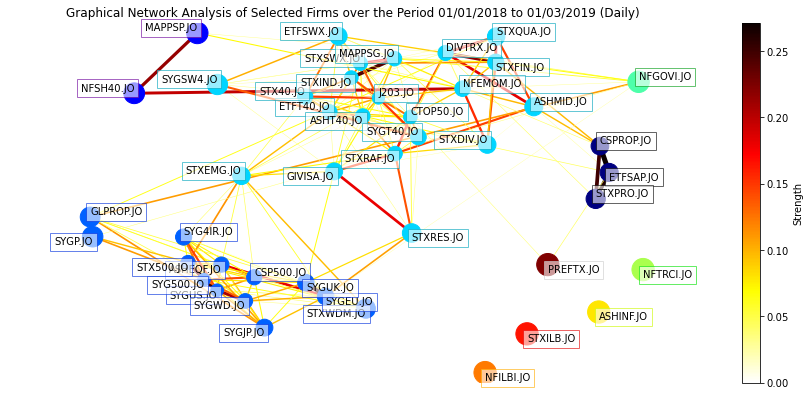

In [67]:
print('Results over the time period ', start_date, ' to ', end_date, ':')
print()

# Output the Clustering information, graphical network plot, 
# as well as summary statistics (optional) and the individual firm performance (optional)
# Store the correlation matrix and precision matrix in "est" (stands for estimates)
# Store the plotting configuration information in "con_fig" which will be needed if we want to use the ZOOM functions
## Note: you can view the correlation matrix by looking at est[0] and view the precision matrix by looking at est[1] 
est, con_fig = graphicalAnalysis(data, start_date, end_date, 
                                 Sectors_chosen, drop_firm, 
                                 display_SumStat = False, display_IndRet = False)

### Findings:

10 clusters were found in this period; 4 systematic and 6 independent
- Note: Risk-Independent assets stayed the same over different modelling periods, this implies great robustness of the methodology when determining persistence of independence in a given asset universe

<a class="anchor" id="2"></a>
# Step 3) Test the 'Pure Portfolios' of Independent assets
- Build Equal Risk Contribution and Equally Weighted Portfolios comprised of the Independent assests.

,Annualized Return %,Annualized Vol %,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown %
NFGOVI.JO,8.73,15.53,0.41,29.78,0.0091,0.0220,0.38,-22.4
NFTRCI.JO,6.67,6.72,2.07,338.39,-0.0244,0.0039,0.57,-7.6
ASHINF.JO,-0.46,55.36,12.23,367.74,-0.4123,0.0383,-0.06,-46.8
NFILBI.JO,2.03,10.71,0.94,107.02,-0.0050,0.0128,-0.06,-21.4
STXILB.JO,3.02,20.72,1.99,138.31,-0.0224,0.0235,0.02,-18.4
PREFTX.JO,-3.54,14.79,-1.19,13.05,0.0162,0.0252,-0.41,-35.4


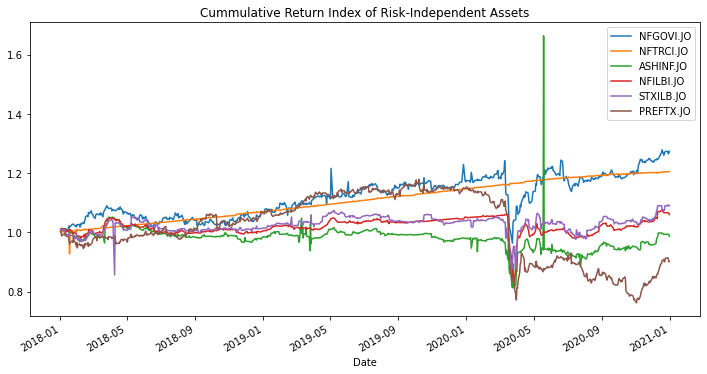

In [398]:
#Returns of assets over period
rets = data['2018':'2020'][['NFGOVI.JO','NFTRCI.JO','ASHINF.JO','NFILBI.JO','STXILB.JO','PREFTX.JO']].copy()

#Cumulative returns of independent assets
cum_rets = (rets + 1).cumprod()
cum_rets.plot(figsize=(12,6), title = 'Cumulative Return Index of Risk-Independent Assets')

#performance
pa.summary_stats(rets)

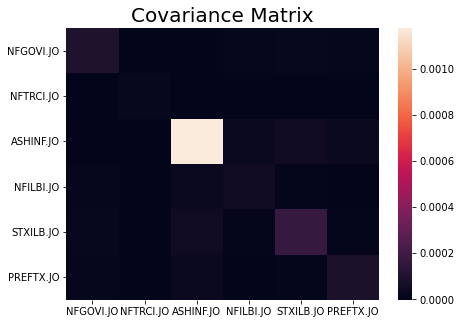

In [269]:
cov = rets.cov()
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(cov) # create seaborn heatmap
plt.title('Covariance Matrix', fontsize = 20) # title with fontsize 20
plt.show()

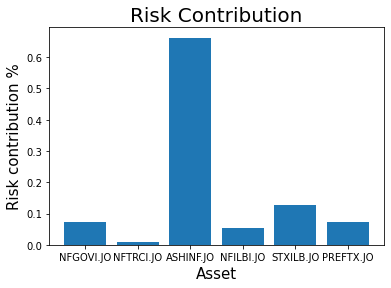

In [103]:
ax = plt.bar(pa.risk_contribution(w, cov).index, pa.risk_contribution(w, cov).tolist())
plt.title('Risk Contribution', fontsize = 20) # title with fontsize 20
plt.xlabel('Asset', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('Risk contribution %', fontsize = 15) # y-axis label with fontsize 15
plt.show()



### Equal weighted and Equal risk contribution portfolios 



In [287]:
# Equal weights
n = rets.shape[1]
w = np.repeat(1/n,n)

# Equal Risk Contribution Weights
erc_weights = pa.target_risk_contributions(w, cov).round(2)

print(f' equal risk weights: \n{np.round(w, 3)} \n')
print(f' equal risk contribution weights: \n{erc_weights}')

 equal risk weights: 
[0.167 0.167 0.167 0.167 0.167 0.167] 

 equal risk contribution weights: 
[0.13 0.38 0.04 0.19 0.1  0.15]


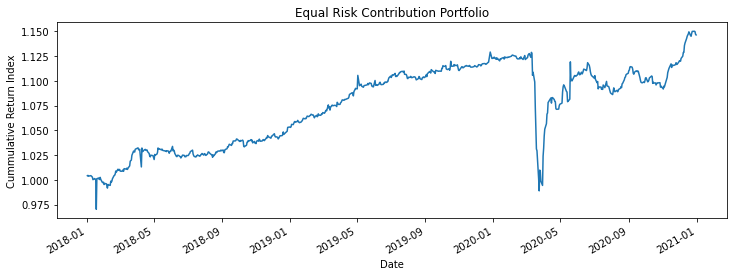

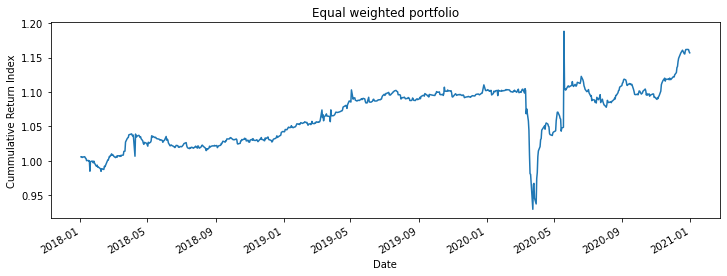

,Annualized Return %,Annualized Vol %,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown %
Equal Risk Weighted,4.84,6.27,0.44,35.70,0.00,0.01,0.33,-12.4
Equal Weighted,5.17,11.83,6.56,160.98,-0.03,0.01,0.20,-16.3


In [308]:
temp0 = (rets@erc_weights ).to_frame()
temp0 = pa.summary_stats(temp0)
temp0.index  = ['Equal Risk Weighted']
#display(temp0)
((rets@erc_weights)+1).cumprod().plot(figsize=(12,4), title = 'Equal Risk Contribution Portfolio', ylabel = 'Cummulative Return Index')
plt.show()
((rets@w)+1).cumprod().plot(figsize=(12,4), title = 'Equal weighted portfolio', ylabel = 'Cummulative Return Index')
plt.show()
temp1 = (rets@w).to_frame()
temp1 = pa.summary_stats(temp1)
temp1.index  = ['Equal Weighted']
temp0.append(temp1)

<a class="anchor" id="3"></a>
# Step 4) Experiment
- Use random portfolio construction to test the impact of adding our Risk-Independent assets

- The expected results are: portfolio performance drops, but risk-adjusted performance increases.

In [ ]:
#### build 2 random portfolios
# 1) random porfolio of 10 assets
# 2) same random porfolio as above, but with one of the assets being swapped out for a Risk-Independent asset

treated_results = pd.DataFrame()
control_results = pd.DataFrame()
test_results = pd.DataFrame()

train_region, test_region, end_region = '2018', '2019', '2020'
i = 0
while i < 1000: 
    
    #get random porfolios:
    random_universe = data.sample(n=10,axis='columns')
    random_uncorr = rets.sample(n=1,axis='columns')
    all_ass = random_universe.columns.tolist()
    test_ass = random_uncorr.columns.tolist()
    check = any(item in test_ass for item in all_ass)
    if check == True:
        pass

    test_port = random_universe.copy() #.append(random_uncorr)
    #keep portfolio size constant
    test_port = test_port.iloc[:,:-1]
    test_port['Uncorr'] = random_uncorr.copy()
    
    # Equal weights for control
    n = random_universe.shape[1]
    w = np.repeat(1/n,n)
    
    # Equal contribution for control
    cov = random_universe[train_region].cov()
    #w = pa.target_risk_congmvtributions(w, cov)
    w = pa.gmv(cov)
    
    #control_results
    control_results[i] = ((random_universe[test_region:end_region]@w)+1).cumprod()
    
    # Equal weights for treated
    n = test_port.shape[1]
    w = np.repeat(1/n,n)

    # Equal contribution for treated
    cov = test_port[train_region].cov()
    #w = pa.target_risk_contributions(w, cov)
    w = pa.gmv(cov)
    
    #treated_results
    treated_results[i] = ((test_port[test_region:end_region]@w)+1).cumprod()
    i = i+1
    
bins = np.linspace(-2, 2, 100)
fig, ax = plt.subplots(figsize = (12,6))
plt.hist(control_results.iloc[-1,:], bins, alpha=0.5, label='control')
plt.hist(treated_results.iloc[-1,:], bins, color = 'r', alpha=0.5, label='treated')
plt.legend(loc='upper right')
plt.show()
print(f'control mean: {control_results.iloc[-1,:].mean()}', f'\ntreated mean: {treated_results.iloc[-1,:].mean()}')
#plt.title('Covariance Matrix', fontsize = 20) # title with fontsize 20

In [395]:
diff = treated_results - control_results
diff_rets = treated_results.pct_change() - control_results.pct_change() 
diff_rets = diff_rets.dropna()

In [396]:
start = rets[test_region].reset_index().iloc[0,0]
end = rets[end_region].reset_index().iloc[-1,0]

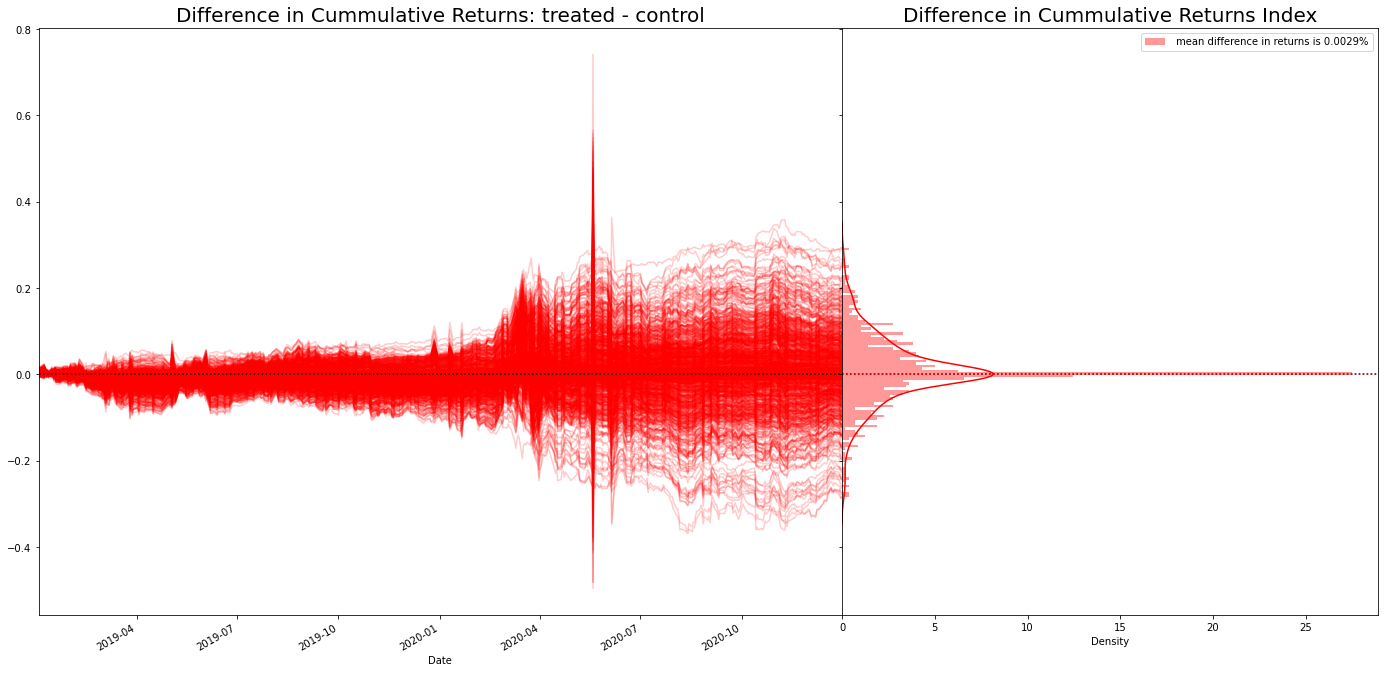

In [405]:
fig, (line_ax, hist_ax) = plt.subplots(nrows=1, ncols=2, sharey=True, gridspec_kw={'width_ratios':[3,2]}, figsize=(24, 12))
plt.subplots_adjust(wspace=0.0)

diff.plot(ax=line_ax,  alpha=0.2, color="red", legend = False) 
line_ax.set_xlim(left=start, right = end)
line_ax.axhline(y=0, ls=":", color="black")
hist_ax.axhline(y=0, ls=":", color="black")
hist_ax.axhline(y=diff_mean, ls=":", color="red")

line_ax.set_title('Difference in Cumulative Returns: treated - control', fontsize = 20)
hist_ax.set_title('Difference in Cumulative Returns Index', fontsize = 20)

diff_mean = diff_rets.iloc[-1,:].mean()
sns.distplot(diff.iloc[-1,:], ax=hist_ax, vertical=True, color = 'red', label = f' mean difference in returns is {round(diff_mean*100, 4)}%', bins = 100)
#hist_ax.set_xlim(left=start, right = 15)
hist_ax.legend()
plt.show()

In [197]:
control_rets = control_results.pct_change().dropna()
treated_rets = treated_results.pct_change().dropna()

### Cumulative Returns

compare the distribution of cumulative returns for *control vs treated*

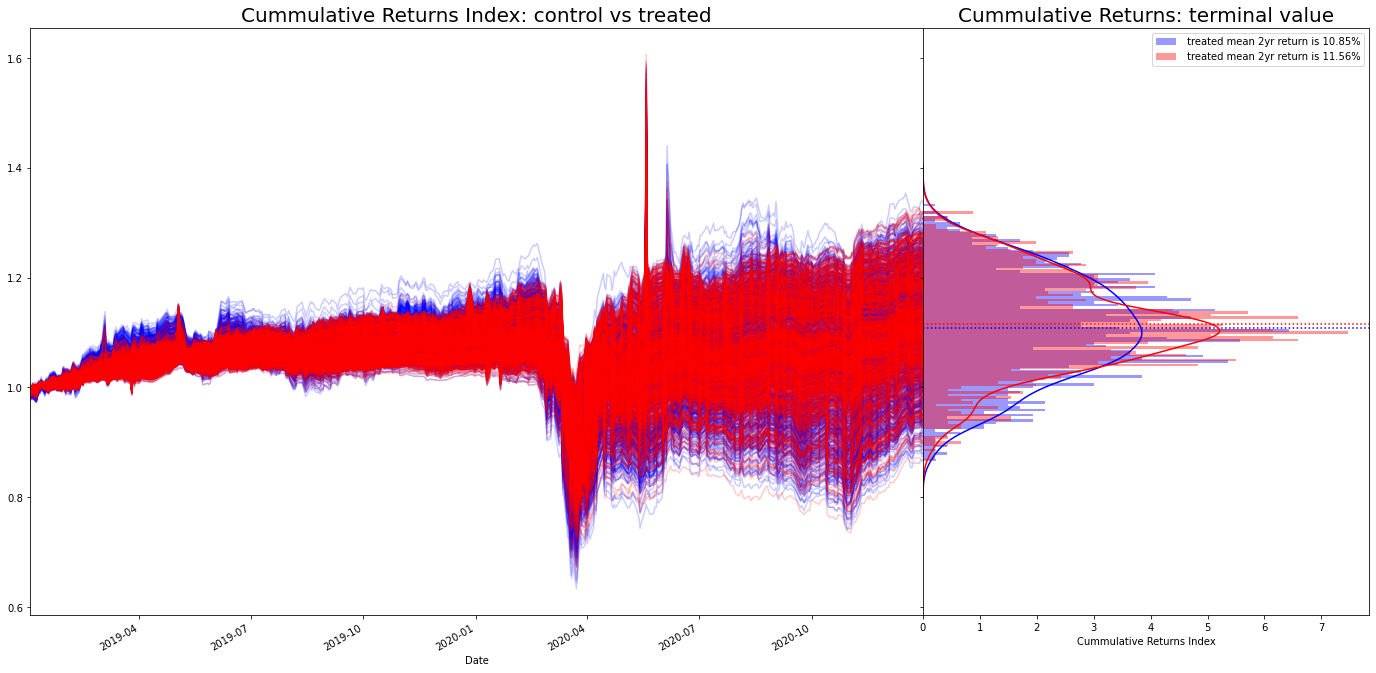

In [258]:
fig, (line_ax, hist_ax) = plt.subplots(nrows=1, ncols=2, sharey=True, gridspec_kw={'width_ratios':[2,1]}, figsize=(24, 12))
plt.subplots_adjust(wspace=0.0)

control_results.plot(ax=line_ax, alpha=0.2,legend = False, color="blue")
treated_results.plot(ax=line_ax, alpha=0.2,legend = False, color="red")

line_ax.set_xlim(left=start, right = end)
hist_ax.axhline(y=control_results.iloc[-1,:].mean(), ls=":",  color="blue")
hist_ax.axhline(y=treated_results.iloc[-1,:].mean(), ls=":",  color="red")

control_mean = control_results.iloc[-1,:].mean()
treated_mean = treated_results.iloc[-1,:].mean()

sns.distplot(control_results.iloc[-1,:], ax=hist_ax, vertical=True, color = 'blue', label = f' control mean 2yr return is {round((control_mean-1)*100, 2)}%', bins = 100)
sns.distplot(treated_results.iloc[-1,:], ax=hist_ax, vertical=True, color = 'red', label = f' treated mean 2yr return is {round((treated_mean-1)*100, 2)}%', bins = 100)

line_ax.set_title('Cumulative Returns Index: control vs treated', fontsize = 20)
hist_ax.set_title('Cumulative Returns: terminal value', fontsize = 20)
hist_ax.legend()

plt.show()

In [ ]:
treated_sumstats = pa.summary_stats(treated_rets)
control_sumstats = pa.summary_stats(control_rets)
control_sumstats

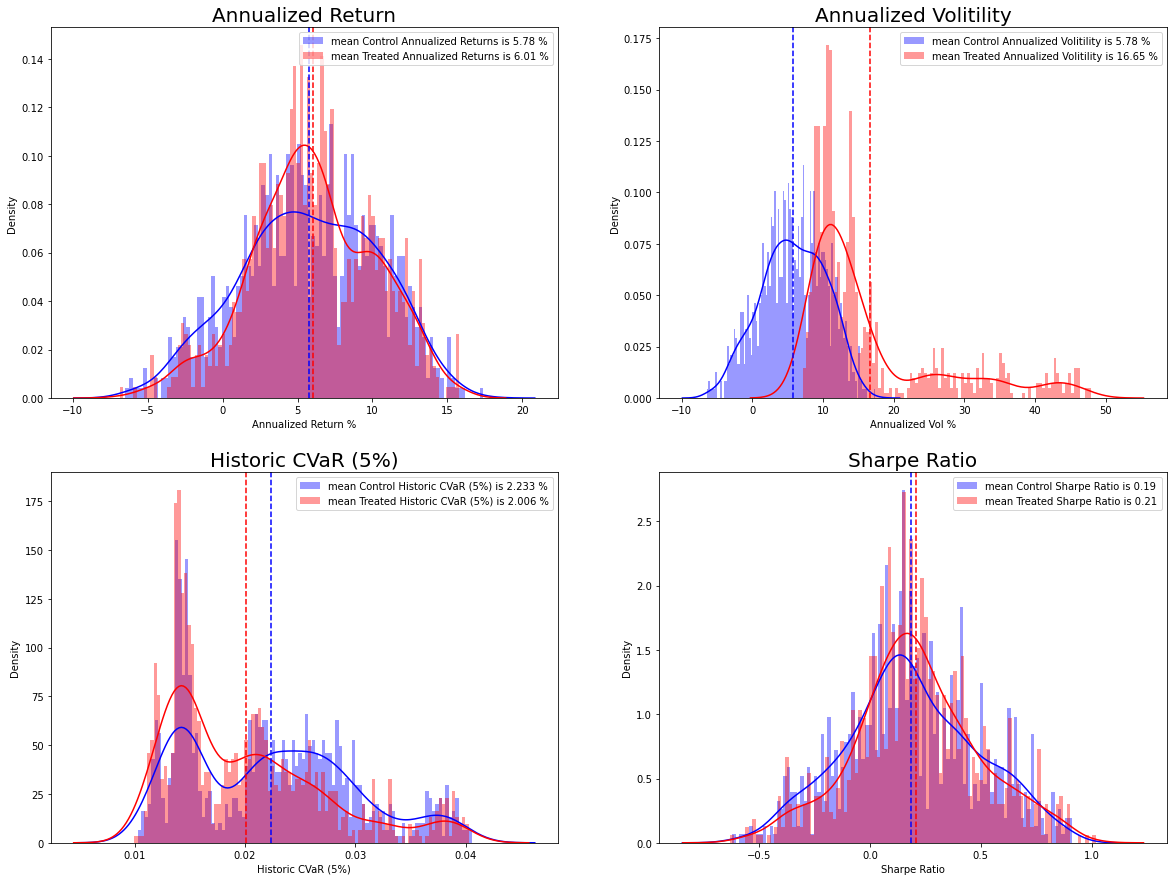

In [403]:
control_ann_sr = control_sumstats['Sharpe Ratio']
treated_ann_sr = treated_sumstats['Sharpe Ratio']
control_hist_cvar = control_sumstats['Historic CVaR (5%)']
treated_hist_cvar = treated_sumstats['Historic CVaR (5%)']
control_ann_vol = control_sumstats['Annualized Return %']
treated_ann_vol = treated_sumstats['Annualized Vol %']
control_ann_rets = control_sumstats['Annualized Return %']
treated_ann_rets = treated_sumstats['Annualized Return %']


fig, axs = plt.subplots(2, 2, figsize = (20,15))

axs[0, 0].set_title('Annualized Return', fontsize = 20)
sns.distplot(control_ann_rets,color="blue", ax = axs[0, 0],  label =  f'mean Control Annualized Returns is {round((control_ann_rets.mean()), 2)} %', bins=100 )
sns.distplot(treated_ann_rets,color="red", ax = axs[0,0],  label =  f'mean Treated Annualized Returns is {round(treated_ann_rets.mean(), 2)} %', bins=100 )
axs[0, 0].legend(loc='upper right')
axs[0, 0].axvline(treated_ann_rets.mean(), ls="--", color="red")
axs[0, 0].axvline(control_ann_rets.mean(), ls="--", color="blue")


axs[0, 1].set_title('Annualized Volatility', fontsize = 20)
sns.distplot(control_ann_vol,color="blue", ax = axs[0, 1],  label =  f'mean Control Annualized Volatility is {round((control_ann_vol.mean()), 2)} %', bins=100 )
sns.distplot(treated_ann_vol,color="red", ax = axs[0, 1],  label =  f'mean Treated Annualized Volatility is {round(treated_ann_vol.mean(), 2)} %', bins=100 )
axs[0, 1].legend(loc='upper right')
axs[0, 1].axvline(treated_ann_vol.mean(), ls="--", color="red")
axs[0, 1].axvline(control_ann_vol.mean(), ls="--", color="blue")


axs[1, 0].set_title('Historic CVaR (5%)', fontsize = 20)
sns.distplot(control_hist_cvar,color="blue", ax = axs[1, 0],  label =  f'mean Control Historic CVaR (5%) is {round((control_hist_cvar.mean()*100), 3)} %', bins=100 )
sns.distplot(treated_hist_cvar,color="red", ax = axs[1, 0],  label =  f'mean Treated Historic CVaR (5%) is {round(treated_hist_cvar.mean()*100, 3)} %', bins=100 )
axs[1, 0].legend(loc='upper right')
axs[1, 0].axvline(treated_hist_cvar.mean(), ls="--", color="red")
axs[1, 0].axvline(control_hist_cvar.mean(), ls="--", color="blue")


axs[1, 1].set_title('Sharpe Ratio', fontsize = 20)
sns.distplot(control_ann_sr,color="blue", ax = axs[1, 1],  label =  f'mean Control Sharpe Ratio is {round((control_ann_sr.mean()), 2)}', bins=100 )
sns.distplot(treated_ann_sr,color="red", ax = axs[1, 1],  label =  f'mean Treated Sharpe Ratio is {round(treated_ann_sr.mean(), 2)}', bins=100 )
axs[1,1].legend(loc='upper right')
axs[1, 1].axvline(treated_ann_sr.mean(), ls="--", color="red")
axs[1, 1].axvline(control_ann_sr.mean(), ls="--", color="blue")

plt.show()

<a class="anchor" id="performance"></a>

Treated **Annualized Returns** are marginally better. The kernel density estimation show that treated annualized returns distribution outperforms the control over the <0% interval.

Treated **Annualized Volatility** is significantly higher. This is largely due to *ASHINF.JO*, which has a 50% annualized volatility.

**The Historic Conditional Value-at-Risk (CVaR)** at alpha = 5%  shows that the treated distribution has significantly less downside risk compared to the control. The density kernel shows that the treated distribution outperforms the control on the  >2% interval

Treated **Sharpe Ratio** distribution outperforms the control. It has a greater mean and lower dispersion. I would interpret this with caution since we badly behaved volatility estimates.


### Overall Findings
- marginal difference in cumulative returns, for the better
- significant difference in average Sharpe Ratio, for the better.
- significant downside risk improvement.

### What next?
- Develop better portfolio construction methods to exploit benefits of theses independent assets. Liability Driven Investment (LDI)and other methods that hold 'safe' assets and expose only a portion to risky assets will be able to leverage the unique properties of *NFTRCI.JO*.

- Include **Unit Trusts** and **Mutual Funds** as part of the universe

- Develop better performance metrics for fund comparison


<br />




## Thank You